In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [178]:
data = pd.read_csv("./final.csv", index_col=0)

In [179]:
data.head()

,text,y
0,urgent business assistance and partnershipdear...,1
1,i am mr ben suleman a custom officer and work ...,1
2,his royal majesty hrm crown ruler of eleme ki...,1
3,his royal majesty hrm crown ruler of eleme ki...,1
4,it is with a heart full of hope that i write...,1


# TF-IDF

In [244]:
stop_words = []

with open('./stop_words.txt', 'r') as f:
    for _ in range(127):
        tmp = f.readline()
        tmp = tmp.replace('\n', '')
        stop_words.append(tmp)

In [245]:
X, y = data['text'], data['y']

In [294]:
tfidf = TfidfVectorizer(max_df=0.01, stop_words=stop_words)

In [295]:
X = np.array(X, dtype='U')

In [296]:
tfidf.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.01, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', '...'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [297]:
tfidf.stop_words_

{'agreement',
 'attached',
 'calendar',
 'call',
 'credit',
 'date',
 'day',
 'deal',
 'dear',
 'dont',
 'draft',
 'email',
 'enron',
 'file',
 'find',
 'following',
 'friday',
 'gas',
 'get',
 'go',
 'going',
 'good',
 'hey',
 'hi',
 'im',
 'jeff',
 'know',
 'last',
 'let',
 'letter',
 'like',
 'list',
 'mark',
 'may',
 'meeting',
 'monday',
 'need',
 'new',
 'office',
 'one',
 'per',
 'please',
 'received',
 'report',
 'request',
 'review',
 'revised',
 'schedule',
 'see',
 'send',
 'sent',
 'sorry',
 'start',
 'th',
 'thanks',
 'think',
 'time',
 'today',
 'us',
 'want',
 'week',
 'would'}

In [298]:
X_tf = tfidf.transform(X)

# Validation curve

In [299]:
def plot_val_curve(param_name, param_range):
    train_score, test_score = validation_curve(
        BernoulliNB(),
        X_tf, y,
        param_name=param_name,
        param_range=param_range,
        cv=10,
        scoring='recall'
    )
    
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    
    plt.plot(param_range, train_score_mean, c='k', label='train')
    plt.plot(param_range, test_score_mean, c='r', label='test')
    plt.ylabel('recall')
    plt.legend()

/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: Use

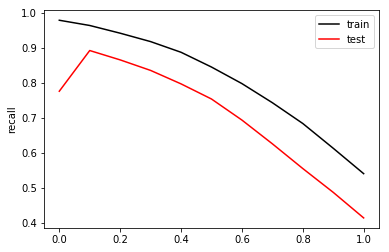

In [300]:
plot_val_curve('alpha', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Learning-curve

In [301]:
def plot_learning_curve():
    train_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    train_size, train_score, test_score = learning_curve(
        BernoulliNB(alpha=0.1, binarize=0.0),
        X_tf, y,
        train_sizes=train_range,
        cv=10,
        scoring='recall'
    )
    
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    
    plt.plot(train_size, train_score_mean, c='k', label='train')
    plt.plot(train_size, test_score_mean, c='r', label='test')
    #plt.xlim([0, 0.4])
    plt.ylabel('recall')
    plt.legend()

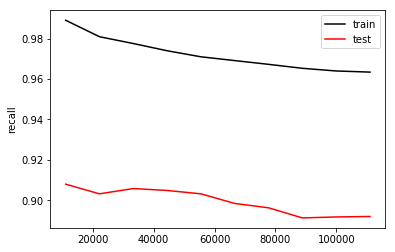

In [302]:
plot_learning_curve()

# Cross-validation (K=10)

In [303]:
cross_validate(BernoulliNB(alpha=0.1, binarize=0.0), X_tf, y, scoring='recall', cv=10)

/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.04450607, 0.03633404, 0.03250599, 0.03254604, 0.02960706,
        0.03048706, 0.02871799, 0.0313971 , 0.03222871, 0.03027892]),
 'score_time': array([0.0054729 , 0.0064919 , 0.00583601, 0.00541806, 0.00566792,
        0.00637269, 0.005265  , 0.00522089, 0.00585008, 0.00524378]),
 'test_score': array([0.91904762, 0.90238095, 0.90952381, 0.87142857, 0.92142857,
        0.91408115, 0.8973747 , 0.8973747 , 0.86873508, 0.81861575]),
 'train_score': array([0.9610596 , 0.96476821, 0.9610596 , 0.96397351, 0.96423841,
        0.96239407, 0.96451271, 0.96345339, 0.96345339, 0.96557203])}

# Classification Report

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.3)

In [305]:
clf = BernoulliNB(alpha=0.1, binarize=0.0)

In [306]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [307]:
pred = clf.predict(X_test)

In [308]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     35824
          1       0.67      0.92      0.77      1205

avg / total       0.99      0.98      0.98     37029



# ROC curve

In [309]:
y_scores = clf.predict_proba(X_test)

In [310]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

In [311]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

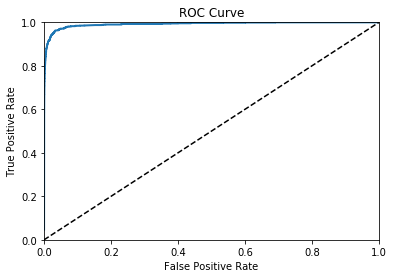

In [312]:
plot_roc_curve(fpr, tpr, label='NaiveBayes')

In [313]:
roc_auc_score(y_test, y_scores[:, 1])

0.9917234140537695